<a href="https://colab.research.google.com/github/saraibare/3.-Valores-atipicos/blob/main/Act_3_2_Valores_at%C3%ADpicos_por_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

## **Gastos 2020**

In [3]:
d = files.upload()

Saving gastos2020.csv to gastos2020.csv


In [4]:
gastos2020 = pd.read_csv('gastos2020.csv') 
gastos2020.isnull().sum()

Unnamed: 0     0
FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
dtype: int64

<Figure size 1500x800 with 0 Axes>

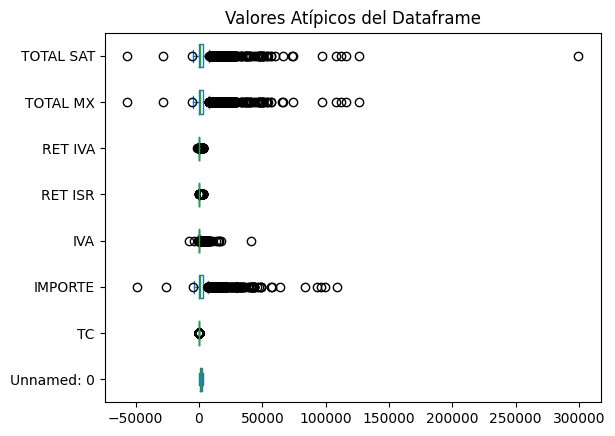

In [5]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos2020.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [7]:
gastos2020 = gastos2020.drop(['Unnamed: 0'], axis=1)
y2020 = gastos2020.select_dtypes(include='number')
y2020.head()

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [8]:
x2020 = gastos2020.select_dtypes(include='object')
x2020.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,TIPO,STATUS
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,Pago,P,Vigente


### **Método de Desviación estándar**

In [9]:
#MÉTODO DE DESVIACIÓN ESTÁNDAR
Limite_Superior= y2020.mean() + 3*y2020.std()
Limite_Inferior= y2020.mean() - 3*y2020.std()
gastos2020_stdv= y2020[(y2020<=Limite_Superior)&(y2020>=Limite_Inferior)]
gastos2020_stdv

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [10]:
#Corroboramos valores nulos del dataframe4
gastos2020_stdv.isnull().sum()

TC            9
IMPORTE      67
IVA          59
RET ISR      21
RET IVA      74
TOTAL MX     65
TOTAL SAT    45
dtype: int64

In [11]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
gastos2020_stdv=gastos2020_stdv.fillna(round(gastos2020_stdv.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
gastos2020_stdv.isnull().sum()

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [12]:
gastos2020_stdv = pd.concat([x2020,gastos2020_stdv], axis=1)
gastos2020_stdv.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,TIPO,STATUS,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,Pago,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.00,0.00


<Figure size 1500x800 with 0 Axes>

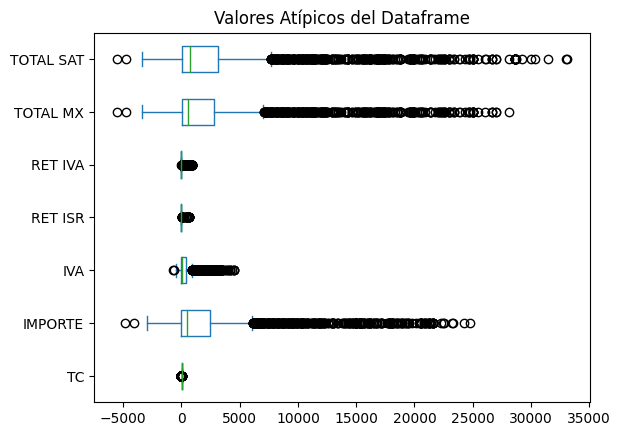

In [13]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos2020_stdv.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [14]:
gastos2020_stdv.to_csv("gastos2020_stdv.csv")
files.download("gastos2020_stdv.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Método cuantiles**

In [15]:
percentile25=y2020.quantile(0.25) #Q1
percentile75=y2020.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

#Obtenemos datos limpios del Dataframe
gastos2020_iqr= y2020[(y2020<=Limite_Superior_iqr)&(y2020>=Limite_Inferior_iqr)]
gastos2020_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,0.00,NaN,0.0,0.0,2248.28,NaN
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,1.0,NaN,NaN,0.0,0.0,NaN,NaN
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [16]:
#Corroboramos valores nulos del dataframe LIMPIO
gastos2020_iqr.isnull().sum()

TC           400
IMPORTE      423
IVA          445
RET ISR       45
RET IVA      253
TOTAL MX     420
TOTAL SAT    426
dtype: int64

In [17]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
gastos2020_iqr = gastos2020_iqr.fillna(round(gastos2020_iqr.mean(),1))
gastos2020_iqr.isnull().sum()

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [18]:
# Unimos
gastos2020_iqr = pd.concat([x2020,gastos2020_iqr], axis=1)
gastos2020_iqr.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,TIPO,STATUS,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,1.0,0.0,144.9,0.0,0.0,2248.28,1333.0
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,1.0,490.0,78.4,0.0,0.0,568.40,568.4
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,1.0,195.0,31.2,0.0,0.0,226.20,226.2
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,1.0,1078.3,144.9,0.0,0.0,1239.10,1333.0
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,Pago,P,Vigente,1.0,0.0,0.0,0.0,0.0,0.00,0.0


In [19]:
gastos2020_iqr.to_csv("gastos2020_iqr.csv")
files.download("gastos2020_iqr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Gastos 2021**

In [22]:
d = files.upload()

Saving gastos2021.csv to gastos2021.csv


In [24]:
gastos2021 = pd.read_csv('gastos2021.csv') 
gastos2021 = gastos2021.drop(['MP'], axis=1)
gastos2021.isnull().sum()

Unnamed: 0     0
FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
dtype: int64

<Figure size 1500x800 with 0 Axes>

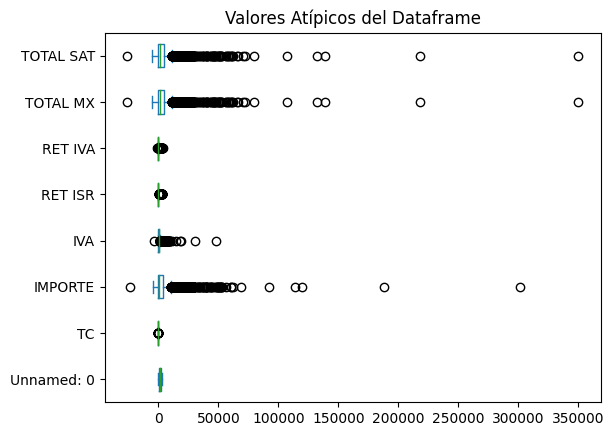

In [25]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos2021.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [26]:
gastos2021 = gastos2021.drop(['Unnamed: 0'], axis=1)
y2021 = gastos2021.select_dtypes(include='number')
y2021.head()

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3


In [27]:
x2021 = gastos2021.select_dtypes(include='object')
x2021.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,TIPO,STATUS
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,I,Vigente
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,I,Vigente
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,I,Vigente


### **Método de Desviación estándar**

In [28]:
#MÉTODO DE DESVIACIÓN ESTÁNDAR
Limite_Superior= y2021.mean() + 3*y2021.std()
Limite_Inferior= y2021.mean() - 3*y2021.std()
gastos2021_stdv= y2020[(y2021<=Limite_Superior)&(y2021>=Limite_Inferior)]
gastos2021_stdv

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Corroboramos valores nulos del dataframe4
gastos2021_stdv.isnull().sum()

TC           331
IMPORTE      350
IVA          345
RET ISR      339
RET IVA      388
TOTAL MX     347
TOTAL SAT    347
dtype: int64

In [30]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
gastos2021_stdv=gastos2021_stdv.fillna(round(gastos2021_stdv.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
gastos2021_stdv.isnull().sum()

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [31]:
gastos2021_stdv = pd.concat([x2021,gastos2021_stdv], axis=1)
gastos2021_stdv.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,TIPO,STATUS,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,I,Vigente,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,I,Vigente,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,I,Vigente,1.0,0.00,0.00,0.0,0.0,0.00,0.00


<Figure size 1500x800 with 0 Axes>

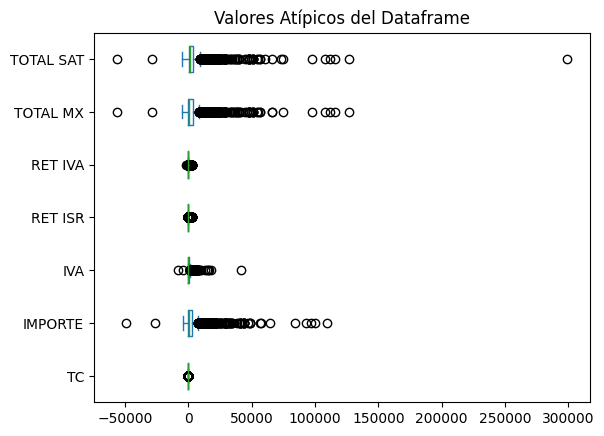

In [32]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos2021_stdv.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [33]:
gastos2021_stdv.to_csv("gastos2021_stdv.csv")
files.download("gastos2021_stdv.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Método cuantiles**

In [34]:
percentile25=y2021.quantile(0.25) #Q1
percentile75=y2021.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

#Obtenemos datos limpios del Dataframe
gastos2021_iqr= y2021[(y2021<=Limite_Superior_iqr)&(y2021>=Limite_Inferior_iqr)]
gastos2021_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3031,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3032,1.0,NaN,705.58,0.0,0.0,NaN,NaN
3033,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [35]:
#Corroboramos valores nulos del dataframe LIMPIO
gastos2021_iqr.isnull().sum()

TC            24
IMPORTE      336
IVA          342
RET ISR       56
RET IVA      212
TOTAL MX     347
TOTAL SAT    351
dtype: int64

In [36]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
gastos2021_iqr = gastos2021_iqr.fillna(round(gastos2021_iqr.mean(),1))
gastos2021_iqr.isnull().sum()

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [37]:
# Unimos
gastos2021_iqr = pd.concat([x2021,gastos2021_iqr], axis=1)
gastos2021_iqr.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,TIPO,STATUS,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,I,Vigente,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,I,Vigente,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,I,Vigente,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,I,Vigente,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3


In [38]:
gastos2021_iqr.to_csv("gastos2021_iqr.csv")
files.download("gastos2021_iqr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Gastos 2022**

In [39]:
d = files.upload()

Saving gastos2022.csv to gastos2022.csv


In [41]:
gastos2022 = pd.read_csv('gastos2022.csv') 
gastos2022 = gastos2022.drop(['MP'], axis=1)
gastos2022.isnull().sum()

Unnamed: 0     0
Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
dtype: int64

<Figure size 1500x800 with 0 Axes>

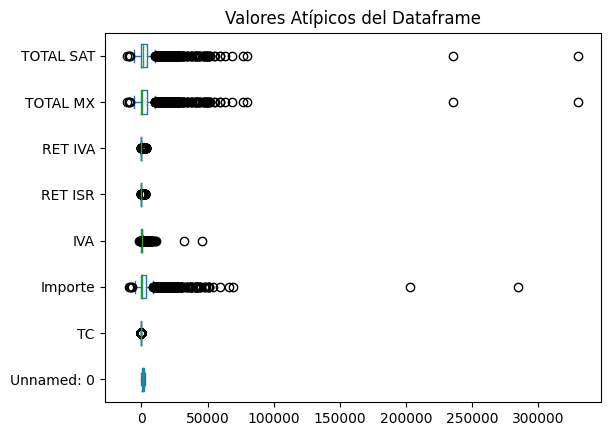

In [42]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos2022.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [43]:
gastos2022 = gastos2022.drop(['Unnamed: 0'], axis=1)
y2022 = gastos2022.select_dtypes(include='number')
y2022.head()

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [44]:
x2022 = gastos2022.select_dtypes(include='object')
x2022.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,Tipo,Status
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,I,Vigente
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,I,Vigente
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,I,Vigente
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,P,Vigente
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,P,Vigente


### **Método de Desviación estándar**

In [45]:
#MÉTODO DE DESVIACIÓN ESTÁNDAR
Limite_Superior= y2022.mean() + 3*y2022.std()
Limite_Inferior= y2022.mean() - 3*y2022.std()
gastos2022_stdv= y2022[(y2022<=Limite_Superior)&(y2022>=Limite_Inferior)]
gastos2022_stdv

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,0.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,0.0,0.00,0.00,0.0,0.0,0.00,0.00


In [46]:
#Corroboramos valores nulos del dataframe4
gastos2022_stdv.isnull().sum()

TC           18
Importe      36
IVA          31
RET ISR      32
RET IVA      32
TOTAL MX     36
TOTAL SAT    36
dtype: int64

In [47]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
gastos2022_stdv=gastos2022_stdv.fillna(round(gastos2022_stdv.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
gastos2022_stdv.isnull().sum()

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [48]:
gastos2022_stdv = pd.concat([x2022,gastos2022_stdv], axis=1)
gastos2022_stdv.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,Tipo,Status,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,I,Vigente,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,I,Vigente,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,I,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0


<Figure size 1500x800 with 0 Axes>

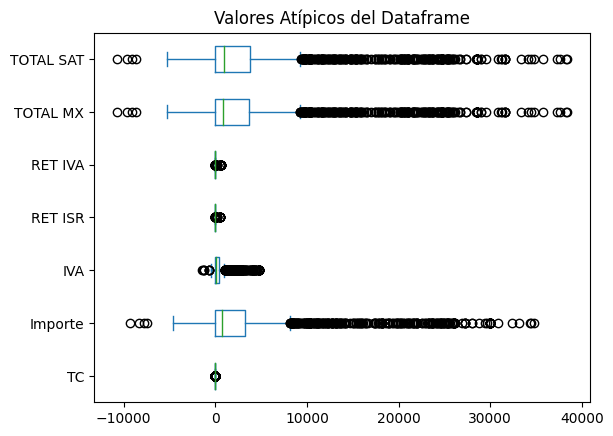

In [49]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos2022_stdv.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [50]:
gastos2022_stdv.to_csv("gastos2022_stdv.csv")
files.download("gastos2022_stdv.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Método cuantiles**

In [51]:
percentile25=y2022.quantile(0.25) #Q1
percentile75=y2022.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

#Obtenemos datos limpios del Dataframe
gastos2022_iqr= y2022[(y2022<=Limite_Superior_iqr)&(y2022>=Limite_Inferior_iqr)]
gastos2022_iqr

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,1.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2573,1.0,NaN,516.32,0.0,0.0,NaN,NaN
2574,NaN,0.00,0.00,0.0,0.0,0.0,0.0
2575,NaN,0.00,0.00,0.0,0.0,0.0,0.0


In [52]:
#Corroboramos valores nulos del dataframe LIMPIO
gastos2022_iqr.isnull().sum()

TC           654
Importe      305
IVA          303
RET ISR       71
RET IVA       70
TOTAL MX     291
TOTAL SAT    288
dtype: int64

In [53]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
gastos2022_iqr = gastos2022_iqr.fillna(round(gastos2022_iqr.mean(),1))
gastos2022_iqr.isnull().sum()

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [54]:
# Unimos
gastos2022_iqr = pd.concat([x2022,gastos2022_iqr], axis=1)
gastos2022_iqr.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,Tipo,Status,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,I,Vigente,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,I,Vigente,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,I,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,P,Vigente,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [55]:
gastos2022_iqr.to_csv("gastos2022_iqr.csv")
files.download("gastos2022_iqr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Gastos 2023**

In [56]:
d = files.upload()

Saving gastos2023.csv to gastos2023.csv


In [57]:
gastos2023 = pd.read_csv('gastos2023.csv') 
gastos2023 = gastos2023.drop(['MP'], axis=1)
gastos2023.isnull().sum()

Unnamed: 0     0
Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
dtype: int64

<Figure size 1500x800 with 0 Axes>

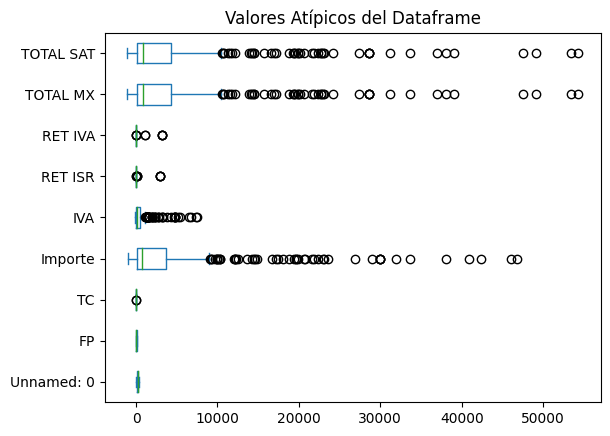

In [59]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos2023.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [60]:
gastos2023 = gastos2023.drop(['Unnamed: 0'], axis=1)
y2023 = gastos2023.select_dtypes(include='number')
y2023.head()

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07


In [61]:
x2023 = gastos2023.select_dtypes(include='object')
x2023.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,Tipo,Status
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,I,Vigente
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,I,Vigente
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,I,Vigente


### **Método de Desviación estándar**

In [63]:
#MÉTODO DE DESVIACIÓN ESTÁNDAR
Limite_Superior= y2023.mean() + 3*y2023.std()
Limite_Inferior= y2023.mean() - 3*y2023.std()
gastos2023_stdv= y2023[(y2023<=Limite_Superior)&(y2023>=Limite_Inferior)]
gastos2023_stdv

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [64]:
#Corroboramos valores nulos del dataframe4
gastos2023_stdv.isnull().sum()

FP            0
TC            2
Importe      13
IVA          13
RET ISR       4
RET IVA       6
TOTAL MX      9
TOTAL SAT     9
dtype: int64

In [65]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
gastos2023_stdv=gastos2023_stdv.fillna(round(gastos2023_stdv.mean(),1))
#Corroboramos valores nulos del dataframe LIMPIO
gastos2023_stdv.isnull().sum()

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [66]:
gastos2023_stdv = pd.concat([x2023,gastos2023_stdv], axis=1)
gastos2023_stdv.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,Tipo,Status,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,I,Vigente,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,I,Vigente,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,I,Vigente,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07


<Figure size 1500x800 with 0 Axes>

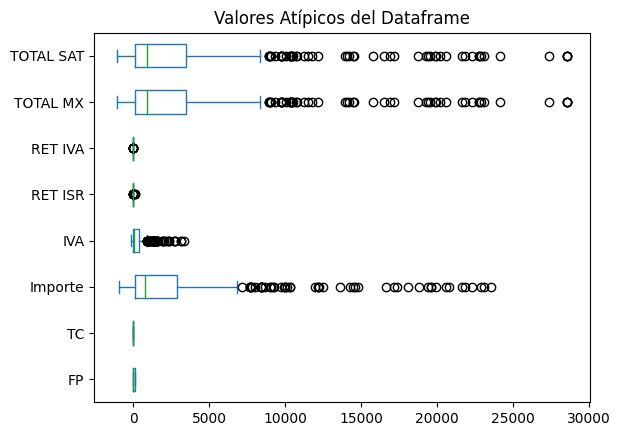

In [68]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
gastos2023_stdv.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [69]:
gastos2023_stdv.to_csv("gastos2023_stdv.csv")
files.download("gastos2023_stdv.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Método cuantiles**

In [70]:
percentile25=y2023.quantile(0.25) #Q1
percentile75=y2023.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr

#Obtenemos datos limpios del Dataframe
gastos2023_iqr= y2023[(y2023<=Limite_Superior_iqr)&(y2023>=Limite_Inferior_iqr)]
gastos2023_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,NaN,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,NaN,682.40,0.0,0.0,NaN,NaN
395,5.0,1.0,NaN,0.00,0.0,0.0,NaN,NaN


In [71]:
#Corroboramos valores nulos del dataframe LIMPIO
gastos2023_iqr.isnull().sum()

FP            0
TC            2
Importe      50
IVA          49
RET ISR       9
RET IVA       9
TOTAL MX     46
TOTAL SAT    46
dtype: int64

In [72]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
gastos2023_iqr = gastos2023_iqr.fillna(round(gastos2023_iqr.mean(),1))
gastos2023_iqr.isnull().sum()

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [73]:
# Unimos
gastos2023_iqr = pd.concat([x2023,gastos2023_iqr], axis=1)
gastos2023_iqr.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,Tipo,Status,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente,0.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,I,Vigente,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,I,Vigente,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,I,Vigente,99.0,1.0,8454.37,176.80,0.0,0.0,9807.07,9807.07


In [74]:
gastos2023_iqr.to_csv("gastos2023_iqr.csv")
files.download("gastos2023_iqr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>